# Translation and scaling invariance in regression models

In [1]:
__author__ = 'Adam Foster and Nick Dingwall'

0. [Introduction: a quick pop quiz for the data scientists](#Introduction:-a-quick-pop-quiz-for-the-data-scientists)  
0. [Mean-centering has no effect](#Mean-centering-has-no-effect)  
0. [Scaling does not affect unregularized regression](#Scaling-does-not-affect-unregularized-regression)  
0. [Scaling affects regularized regression](#Scaling-affects-regularized-regression) 
0. [Conclusion](#Conclusion)

## Introduction: a quick pop quiz for the data scientists

When you're training a regularized regression model, which preprocessing step on the features is more important: __scaling__ (forcing unit variance) or __mean centering__ (forcing zero mean, a special case of __translating__)? 

0. Scaling is always more important.
0. Mean centering is always more important.
0. They're both as important as each other.
0. It depends on the dataset.


### The short answer

When we popped this quiz in the office, 4 was the most popular answer. Perhaps you'll be surprised to learn that the answer is actually 1: mean-centering the features **doesn't make any difference** to model predictions.

### The long answer

If model predictions are what you care about, 1 is the right answer. Mean-centering the features makes no difference as long as you don't penalize the intercept term, whereas scaling does impact predictions in regularized models \cite{the_elements}, pp. 63-64. More generally, regularized regression models show translation invariance: you can add or subtract constants from your features without affecting model predictions. However, they do not show scaling invariance: if you multiply or divide your features by constants, the predictions may change.

If you answered 2, you have a tough argument to make.

If you answered 3, you are half right. 3 is the right answer for **unregularized** regression models because **neither scaling nor mean-centering affects the predictions of unregularized models** \cite{gelmanhill}, p. 53. In more formal language, unregularized regression models are translation *and* scaling invariant.

If you answered 4, maybe you care about interpreting the model coefficients themselves and not just about model predictions. In this case, 4 could be the right answer. The intercept from a model with mean-centered data equals the prediction when all features take their mean value, which could be important for interpretation. On the other hand, we'll show that you can easily recover the intercept you would have found from centered data after you've run your regression with uncentered data. 

### Practical benefits of translation invariance

Your first reaction might be, "Well, I'll just mean-center the features anyway, since it doesn't matter and might even help with interpretation." That is likely to be reasonable for datasets of modest size. However, it's disastrous if you were counting on sparse input representations to help manage a massive dataset. Consider all those zeros in your sparse array. When you subtract the mean, they shift to $-\bar{x}$. A matrix that was 1% dense is suddenly nearly 100% dense and your machine has run out of memory.


### Post structure

This difference between scaling and mean-centering is initially unintuitive, so we'll spend a bit of time proving the following two claims:

0. Mean-centering never affects model predictions in regularized or unregularized models.
0. Scaling never affects unregularized models but does affect regularized ones.

We also discuss the effect of rescaling in regularized regression models, showing that, since regularization shrinks model coefficients towards 0, a rescaling which made one feature very small could lose the signal coming from that predictor.

$\newcommand{\VEC}[1]{\boldsymbol{#1}}$
## Mean-centering has no effect

### Formal argument

*Regularized regression* \cite{the_elements}, pp. 61-83, solves the following minimization problem

\begin{equation}
\min_{\mu, \VEC{\beta}}\; \|Y - \mu {\VEC{1}} - X\VEC{\beta} \|_2^2 + \lambda R(\VEC{\beta})
\end{equation}

where $R$ is the penalization function and ${\VEC{1}}$ is a $n\times 1$ vector of 1's. (As usual, $Y$ is a $n\times 1$ response vector, $X$ is a $n\times p$ feature matrix, $\mu$ is a scalar, $\VEC{\beta}$ is a $p\times 1$ vector of regression coefficients and $\lambda > 0$ is the regularization parameter. Equivalent variants using a column of $1$'s instead of a separate intercept are common \cite{the_elements}, p. 45.)

We've separated out the intercept, $\mu$, to emphasize the fact that it is not penalized. Now let's translate the features by subtracting out the mean of each column (we'll denote these by $\bar{x}_1, \bar{x}_2, \ldots$)

\begin{align}
\begin{split}
\text{for } i=1, \ldots, n:& \\
Z_{i1} &= X_{i1} - \bar{x}_1\\
Z_{i2} &= X_{i2} - \bar{x}_2\\
&\text{etc.}
\end{split}
\end{align}

This can be succinctly written

\begin{equation}
Z = X- {\VEC{1}}\bar{\VEC{x}}^\top
\end{equation}

where $\bar{\VEC{x}}$ is a $p\times 1$ vector whose components are the column means $\bar{x}_1, \bar{x}_2, ...$

Now let's examine the objective function for regression with $Z$ to be minimized over some new variables $\nu$ (intercept) and $\VEC{\theta}$ (coefficients)

\begin{align}
\|Y - \nu {\VEC{1}} - Z\VEC{\theta} \|_2^2 + \lambda R(\VEC{\theta})
&=\|Y - \nu {\VEC{1}} - (X- {\VEC{1}}\bar{\VEC{x}}^\top)\VEC{\theta} \|_2^2 + \lambda R(\VEC{\theta}) \\
&=\|Y - (\nu - \bar{\VEC{x}}^\top\VEC{\theta}) {\VEC{1}} - X\VEC{\theta} \|_2^2 + \lambda R(\VEC{\theta})
\end{align}

Now set $\mu = \nu - \bar{\VEC{x}}^\top\VEC{\theta}$ and $\VEC{\beta} = \VEC{\theta}$ and we're back to the original objective with $X$. That means the minimizers must be related simply by $\hat{\mu} = \hat{\nu} - \bar{\VEC{x}}^\top \hat{\VEC{\theta}}$ and $\hat{\VEC{\beta}} = \hat{\VEC{\theta}}$. 

*Aside*: The hats differentiate between variables (no hats, can take any value) and minimizers (with hats, take a certain value for fixed $X$ and $Y$).

### Predictions stay the same

What about predictions? Suppose we introduce a new 'test' point $\VEC{x}^\star$ and its corresponding $\VEC{z}$-value, which is $\VEC{z}^\star = \VEC{x}^\star - \bar{\VEC{x}}$. To make predictions with the original (not mean-centered) model we use $\hat{\mu} + \VEC{x}^{\star\top}\hat{\VEC{\beta}}$ and for the centered model, we use $\hat{\nu} + \VEC{z}^{\star\top} \hat{\VEC{\theta}}$. But then

\begin{align}
\hat{\mu} + \VEC{x}^{\star\top} \hat{\VEC{\beta}} &= \left( \hat{\nu} - \bar{\VEC{x}}^\top\hat{\VEC{\theta}} \right) + \VEC{x}^{\star\top} \hat{\VEC{\theta}} \\
&= \hat{\nu} + \left(\VEC{x}^\star - \bar{\VEC{x}}\right)^\top \hat{\VEC{\theta}} \\
&= \hat{\nu} + \VEC{z}^{\star\top} \hat{\VEC{\theta}}
\end{align}

So the predictions from the two models are identical.

The important thing to note is that $\hat{\VEC{\beta}} = \hat{\VEC{\theta}}$ so all the regression coefficients stay the same. Only the intercept needs to change. We defined $Z$ by *mean-centering* the columns. Actually, our proof works for **any translation** that we apply to the columns of $X$. This is what we mean by translation invariance.

Suppose you fit a model without mean-centering (in our notation, that means using $X$). How could you recover the intercept you *would have got* using centered data (in our notation, using $Z$)? It's already there for us. The intercept using centered data was called $\hat{\nu}$ and we know $\hat{\nu} = \hat{\mu} + \bar{\VEC{x}}^\top\hat{\VEC{\theta}} = \hat{\mu} + \bar{\VEC{x}}^\top\hat{\VEC{\beta}}$. So the mean-centered intercept is equivalent to
\begin{equation}
\hat{\nu} = \hat{\mu} + \sum_{i=1}^p \bar{x}_i \hat{\beta}_i
\end{equation}


### An example

That derivation was a bit heavy, so let's work through an example. The code is tucked away in `centering_and_scaling.py`:

In [2]:
from centering_and_scaling import *

In [3]:
%matplotlib inline

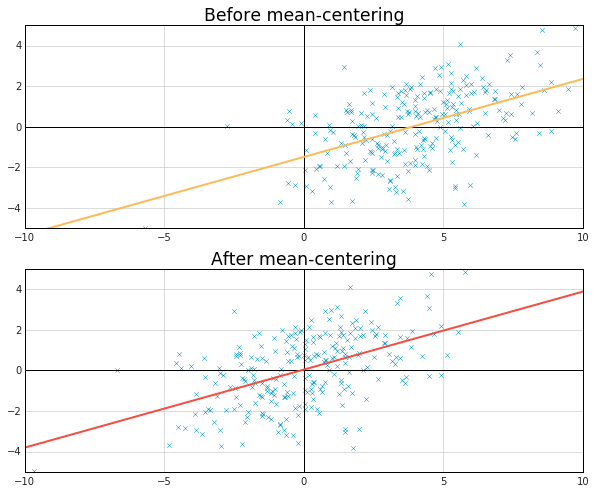

In [4]:
# A dataset:
data = np.random.multivariate_normal(
    mean=[4, 0], cov=[[5, 2], [2, 3]], size=250)
X, y = data[:, 0], data[:, 1]

# Subtract the mean from the features:
empirical_mean = X.mean()
Z = X - empirical_mean

# Before and after comparison:
compare_normalizations(
    X, Z, y, "Before mean-centering", "After mean-centering")

Notice that we have a different intercept, but the same slope. The predictions from these two models will be identical. For instance, the prediction at $x = 10$ is around $2.5$ on the upper graph. The corresponding $z$ is $z = 10 - \bar{x} \approx 6$ with precisely the same prediction on the lower graph. The following code works through this in detail:

In [5]:
# The case of `x`:
x_star = 10
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
x_prediction = lr.predict(x_star)[0]
print("The prediction at x = {} is {:.4}".format(
        x_star, x_prediction))

# The case of `z`:
z_star = x_star - empirical_mean
lr.fit(Z.reshape(-1,1), y)
z_prediction = lr.predict(z_star)[0]
print("The prediction at z = {} - {:.4} = {:.4} is {:.4}".format(
        x_star, empirical_mean, z_star, z_prediction))

The prediction at x = 10 is 2.362
The prediction at z = 10 - 3.956 = 6.044 is 2.362


### Ignoring the intercept

It follows from this result that we can ignore $\mu$ in the regression model. Why is this? We know for sure that we can mean-center $X$ without changing the model. If $X$ is mean-centered, then the optimal value of $\mu$ is the mean of $Y$, written $\bar{Y}$. (This requires just a bit of calculus: ${\bf{1}}^{\top}X = 0$ when you've mean-centered $X$.) We might as well mean-center $Y$ as well, leaving $\mu = 0$, so we can ignore it from now on.


## Scaling does not affect unregularized regression

### Formal argument

Let's now look at scaling in the case of unregularized regression.  We've ignored $\mu$ and there is no $R$ either for an unregularized model, so we have the following minimization problem:

\begin{equation}
\min_\VEC{\beta} \; \|Y - X\VEC{\beta} \|_2^2
\end{equation}

Let's rescale the features by dividing by the standard deviation of each column (we'll denote these by $\sigma_1, \sigma_2, \ldots $)

\begin{align}
\begin{split}
\text{for } i=1, \ldots, n:& \\
Z_{i1} &= \frac{X_{i1}}{\sigma_1}\\
Z_{i2} &= \frac{X_{i2}}{\sigma_2}\\
&\text{etc.}
\end{split}
\end{align}

which we can succinctly write as

\begin{equation}
Z = XD
\end{equation}

where $D$ is a diagonal matrix with $D_{ii} = \sigma_i^{-1}$.

The objective function for regression with $Z$ is

\begin{align}
\|Y - Z\VEC{\theta} \|_2^2 
= \|Y - XD\VEC{\theta} \|^2_2
\end{align}

Now set $\VEC{\beta} = D\VEC{\theta}$ and we're back to the original objective for $X$. That means the minimizers are related simply by $\hat{\VEC{\beta}} = D\hat{\VEC{\theta}}$. Just like with mean-centering, this result actually applies to any rescaling, not just dividing by the standard deviations.

### Predictions stay the same

What about predictions? Suppose we introduce a test point $\VEC{x}^\star$ and its corresponding $\VEC{z}$-value, which is $\VEC{z}^\star = D^T \VEC{x}^\star $. To make predictions with the original (not unit variance) model we use $\VEC{x}^{\star\top}\hat{\VEC{\beta}}$ and for the unit variance model, we use $\VEC{z}^{\star\top}\hat{\VEC{\theta}}$. But then

\begin{align}
\VEC{x}^{\star\top}\hat{\VEC{\beta}} 
&= \VEC{x}^{\star\top}D                    \hat{\VEC{\theta}}   \\
&= \left(D^\top \VEC{x}^\star \right)^\top      \hat{\VEC{\theta}}   \\
&= \VEC{z}^{\star\top}\hat{\VEC{\theta}}
\end{align}

So the predictions from the two models are identical.

### An example

This example is exactly like the previous one, but now we divide by the standard deviation rather than subtracting the mean:

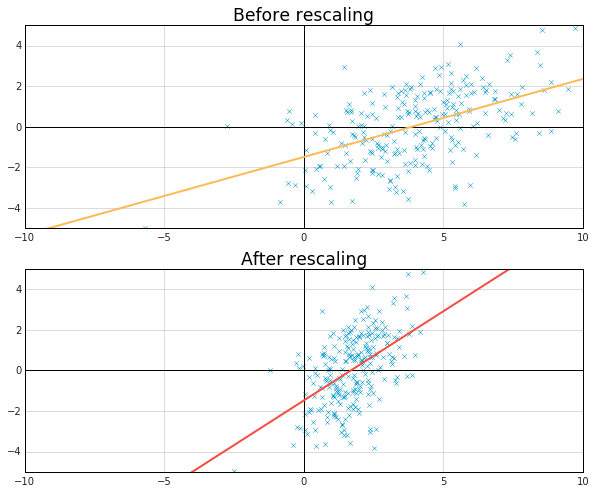

In [6]:
Z = X / X.std()
compare_normalizations(
    X, Z, y, 
    title1="Before rescaling", 
    title2="After rescaling")

These two models certainly _look_ different. It's important to remember that the input to the two models are different, though. For the top model, we input $x = 10$ and get a prediction about $2.5$. For the bottom model we need to input $z = 10/\sigma \approx 4.5$ which then gives a prediction somewhere between $2$ and $3$.

A clearer way to compare these graphs would be:
0. Fit two models: one using $X$ (not unit variance) and one using $Z$ (columns rescaled to unit variance).
0. Plot the $X$ model.
0. Rescale the $Z$ model back so that accepts inputs in $x$-space and plot this.
0. Look to see if the two graphs are the same.

The function `compare_transformed_normalizations` in `centering_and_scaling.py` does just this. 

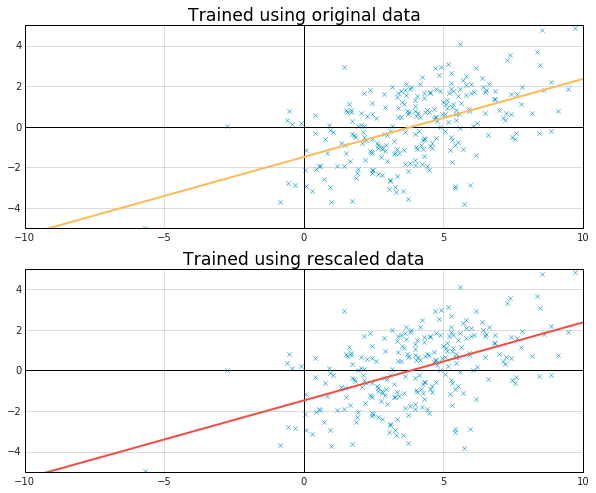

In [7]:
standard_deviation = X.std()
compare_transformed_normalizations(
    X, y, 
    transform=(lambda x : x/standard_deviation), 
    model=LinearRegression(),
    title1="Trained using original data",
    title2="Trained using rescaled data")

It should be completely unsurprising that the lower scatterplot now matches the upper scatterplot. The more notable thing is that the regression line, which was fitted in $z$-space and then transformed, is the same as the line fitted in $x$-space to start with. Thus, we see clearly that scaling doesn't affect the unregularized model.

When we look at regularized regression, these lines will not match.

## Scaling affects regularized regression

### Formal argument

Let's try to redo the proof for regularized regression (that nothing changes) and see where it breaks.
Recall the objective

\begin{equation}
\min_\VEC{\beta} \; \|Y - X\VEC{\beta} \|_2^2 + \lambda R(\VEC{\beta})
\end{equation}
and the rescaling
\begin{equation}
Z = XD
\end{equation}

We'll consider a general $D$ from now on (so need not have $D_{ii} = \sigma_i^{-1}$).

For regression with $Z$ the objective with our new coefficient variable $\VEC{\theta}$ is

\begin{align}
\|Y - Z\VEC{\theta}\|_2^2 + \lambda R(\VEC{\theta})
&= \|Y - XD\VEC{\theta} \|_2^2 + \lambda R(\VEC{\theta})
\end{align}

Now set $\VEC{\beta} = D\VEC{\theta}$

\begin{align}
\|Y - XD\VEC{\theta} \|_2^2 + \lambda R(\VEC{\theta})
&= \|Y - X\VEC{\beta} \|_2^2 + \lambda R(D^{-1}\VEC{\beta}) \\
&\neq \|Y - X\VEC{\beta} \|_2^2 + \lambda R(\VEC{\beta})
\end{align}

Unsurprisingly, the problem is in the regularization term. Instead of regularizing $\VEC{\beta}$ we end up regularizing $D^{-1}\VEC{\beta}$. That means it's unlikely the two problems will have the same minimizers. Although we set $\VEC{\beta} = D\VEC{\theta}$, we can't conclude that $\hat{\VEC{\beta}} = D\hat{\VEC{\theta}}$.

### Quantifying the change

So we know that in regularized regression, the models *might not* be equivalent. Can we be more precise? Let's examine one particular example of regularized regression, the Lasso \cite{tibshirani1996}. For the Lasso we have

\begin{align} 
R(\VEC{\beta})&= \sum_{i=1}^p |\beta_i| \\
R(D^{-1}\VEC{\beta}) &= \sum_{i=1}^p \frac{|\beta_i|}{D_{ii}} \label{eq:lasso}
\end{align}

This tells us that we will strongly penalize coefficients which have a small value of $D_{ii}$. That is, if we scale down a certain predictor, the Lasso will more aggressively shrink the corresponding $\beta_i$. Conversely, we will not apply much shrinkage to $\beta_i$ if the $i$th column of $X$ was scaled *up* a lot.

Let's exemplify:

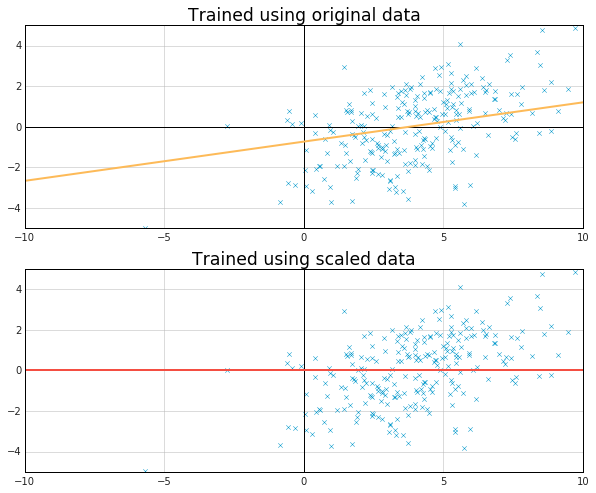

In [8]:
from sklearn.linear_model import Lasso

compare_transformed_normalizations(
    X, y, 
    transform=lambda x : x/3, 
    model=Lasso(),
    title1="Trained using original data",
    title2="Trained using scaled data")

We're seeing exactly what we expected. By making everything three times as small, the model penalized much more strongly, shrinking the regression coefficient exactly to zero.

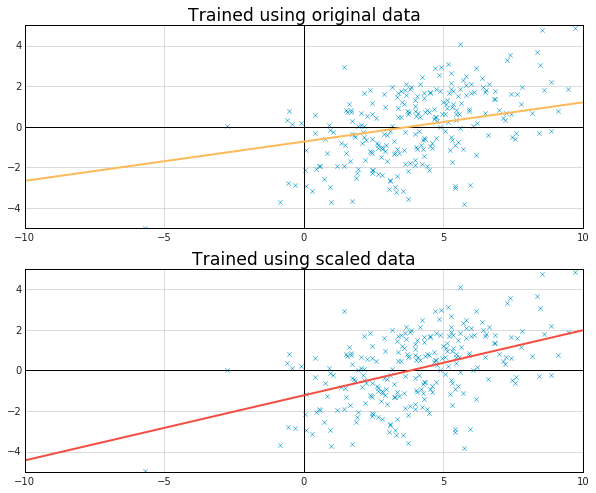

In [9]:
compare_transformed_normalizations(
    X, y, 
    transform=(lambda x : 3*x), 
    model=Lasso(),
    title1="Trained using original data",
    title2="Trained using scaled data")

Conversely, scaling the data up allows a larger regression coefficient. Without over-complicating matters, in one dimension, the rescaling is equivalent to changing the regularization parameter (look back at equation \ref{eq:lasso} with $p=1$). When we scale the data up a lot sending $D\to \infty$, it's the same as making $\lambda \to 0$, meaning we recover the unregularized linear regression model in the limit.

## Conclusion

You can translate features any which way you want **without changing the model**. With scaling you need to be a little more careful when using a *regularized* model &ndash; these models are not scaling invariant. If the scales of predictors vary wildly, models like the Lasso will shrink out the scaled down predictors. To put all predictors on an equal footing, you should be rescaling the columns. Typically this involves forcing the columns to have unit variance, although other options are available \cite{sardy}.

# References

[<a id="cit-the_elements" href="#call-the_elements">1</a>] Jerome Friedman, Trevor Hastie and Robert Tibshirani, ``_The elements of statistical learning_'',  2001.

[<a id="cit-gelmanhill" href="#call-gelmanhill">2</a>] Andrew Gelman and Jennifer Hill, ``_Data analysis using regression and multilevel/hierarchical models_'',  2006.

[<a id="cit-tibshirani1996" href="#call-tibshirani1996">3</a>] Tibshirani Robert, ``_Regression shrinkage and selection via the lasso_'', Journal of the Royal Statistical Society. Series B (Methodological), vol. 58, number 1, pp. 267-288,  1996.

[<a id="cit-sardy" href="#call-sardy">4</a>] Sardy Sylvain, ``_On the practice of rescaling covariates_'', International Statistical Review, vol. 76, number 2, pp. 285-297,  2008.

